## Pytorch Workflow:

In [31]:
what_were_covering = {1: 'data (preparation and loading)',
                    2: 'build a model',
                    3: 'train a model',
                    4: 'evaluate a model',
                    5: 'save and load a model',
                    6: 'put it all together',}



In [32]:
import torch
from torch import nn #nn contains all the modules needed to build a neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.1.1+cpu'

## 1. Preparing and loading data
Data can be almost anything.... as long as you convert it to numbers

* Excel
* Images
* Videos
* DNA
* Audio
* Text

Machine learning / deep learning consists of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *known* data using the linear regression formula. 
We'll use a linear regression formula to make a straight line with *known* **parameters**


In [33]:
# Create *known* parameters
import torch
weight = 0.7
bias = 0.3

# Create *unknown* parameters
start = 0.0
end = 1.0
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [34]:
len(X), len(y)

(50, 50)

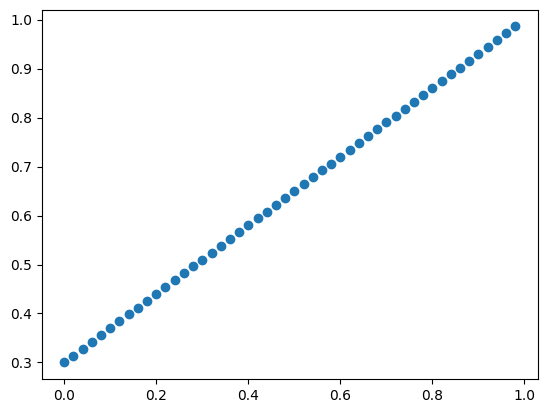

In [35]:
# Plot the data
plt.scatter(X, y, label='y')

### Splitting data into training and testing data


In [36]:
# Create a training and testing split of the data
train_split = int(.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [44]:
# Plot the training set in blue and testing set in red

from turtle import color
import matplotlib.pyplot as plt

def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):

    # Plot the training set in blue and testing set in red
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', label='Training data')
    plt.scatter(test_data, test_labels, c='r', label='Testing data')
    if predictions is not None:
        plt.scatter(test_data, predictions, c='g', label='Predictions')

## Building My 'First' PyTorch Model

What are model does:
1. Start with random values (weights * bias)
2. Look at training data and adjust the values to get closer the the ideal values (the weight & bias)


Does this through 2 main things:
1. Gradient Descent
2. Backpropagation 

In [38]:
from torch import nn
# Create a linear regression model

class LinearRegression(nn.Module): #nn.Module is the base class for all neural network modules
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
        
    # Forward Method to define the computation performed in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return x * self.weights + self.bias #y = wx + b

### Taking a look behind the curtain to see the parameters

Now that we've created our model, let's check to see what the parameters are.

We can use `.parameters` to see the parameters of the model.

In [39]:
# Create our first model by calling the class LinearRegression
# Create a manual seed for reproducibility

import torch
torch.manual_seed(42)

# Create a model
model_0 = LinearRegression()

# Print the parameters of the model
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [40]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()` 

Let's see how well our model works at making predictions at y_test using X_test

When we pass data through our model it will pass it through our forward method

In [41]:
#Make a prediction of the model without training
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

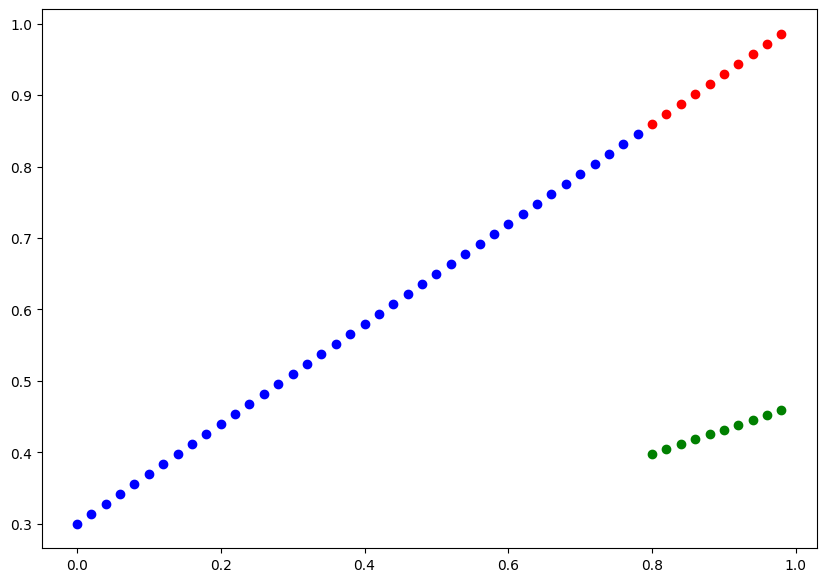

In [45]:
plot_predictions(predictions=y_preds)
